In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import plot_model
from keras.models import Sequential

In [2]:
#loading Data

In [84]:
train = pd.read_csv('C:/Users/vatsa/Downloads/FAshion-MNIST/data/fashion-mnist_train.csv')
test = pd.read_csv('C:/Users/vatsa/Downloads/FAshion-MNIST/data/fashion-mnist_test.csv')
df = train.copy()
df_test = test.copy()

In [4]:

train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

In [5]:
#labels
label_names = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

In [70]:
label_names

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

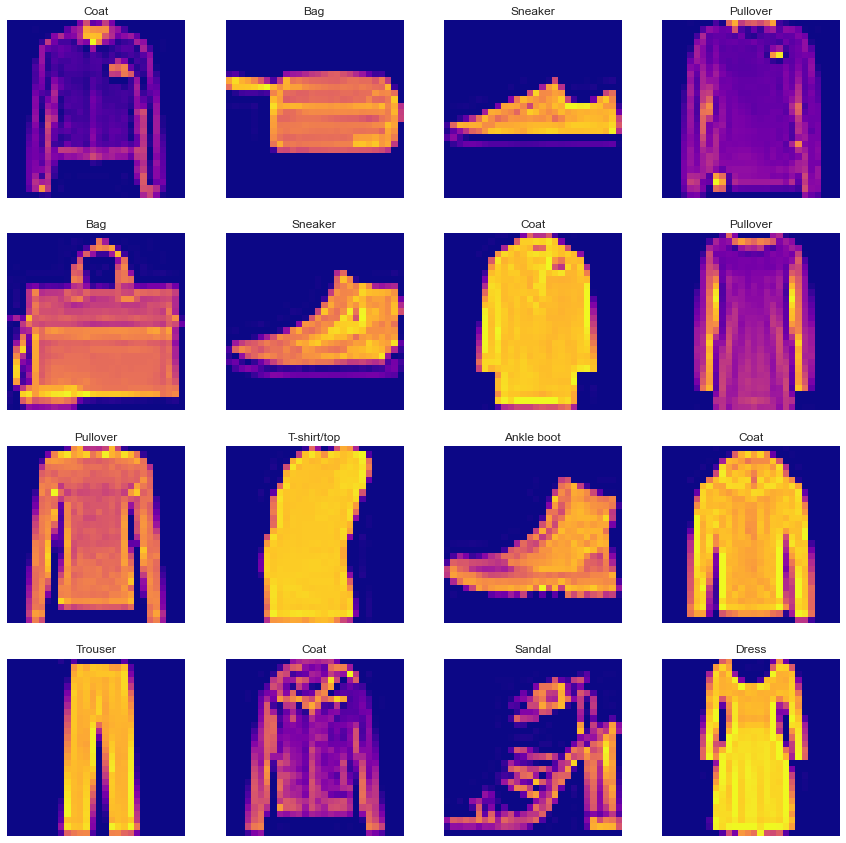

In [87]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df.drop('label', axis=1).values[index].reshape(28,28)
        cloths = df['label'][index]
        axe.imshow(img, cmap='plasma')
        axe.set_title(label_names[cloths])
        axe.set_axis_off()

Image_Label:  T-shirt/top


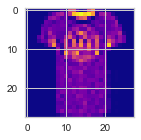

In [129]:
#Sanity check - plot a few images and labels
i = random.randint(2,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap = 'plasma') 
print("Image_Label: ", label_names[int(train_data[i,0])])

In [8]:
#Normalizing
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [9]:
#Converting y

y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)


In [10]:
#Reshaping the X
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [12]:
epochs = 15

In [13]:
#Model 1 
model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model_1.add(MaxPooling2D(pool_size = (2, 2)))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size = (2, 2)))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size = (2, 2)))
model_1.add(Dropout(0.2))

model_1.add(Flatten())

model_1.add(Dense(128, activation = 'relu'))
model_1.add(Dense(25, activation = 'softmax'))


In [14]:
model_1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

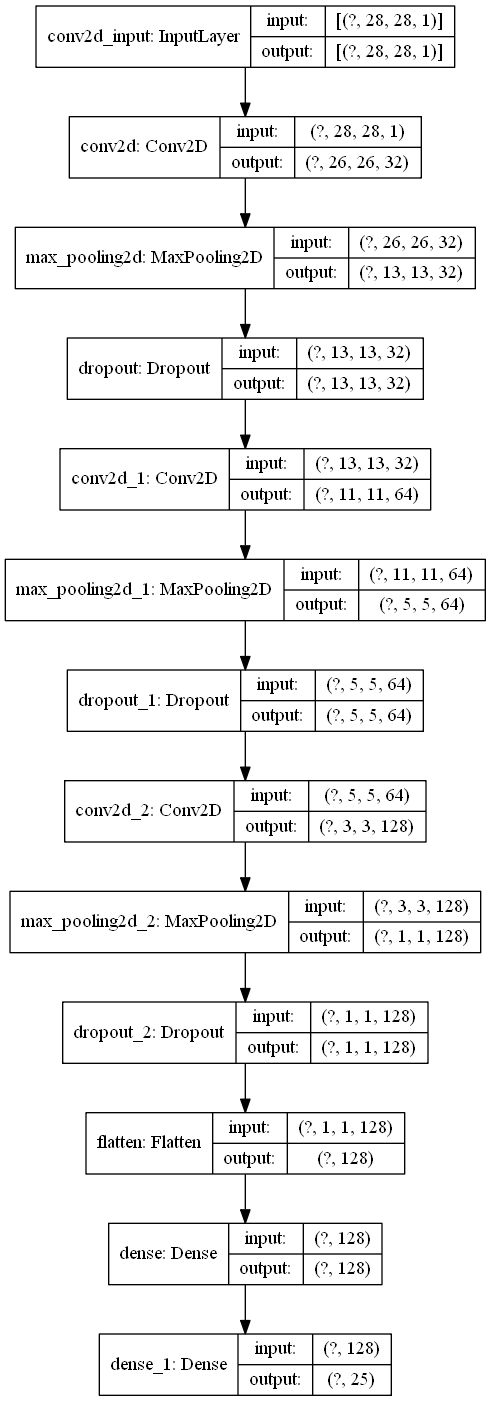

In [15]:
#saving the model_1 design
plot_model(model_1, to_file='model_1.png', show_shapes=True)

In [16]:
#Training the model_1
history1 = model_1.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))
model_1.save('C:/Users/vatsa/Downloads/model_save/model1.hdf5')

Epoch 1/15
469/469 [==============================] - 48s 102ms/step - loss: 0.8647 - acc: 0.6799 - val_loss: 0.5465 - val_acc: 0.7980
Epoch 2/15
469/469 [==============================] - 47s 99ms/step - loss: 0.5517 - acc: 0.7974 - val_loss: 0.4608 - val_acc: 0.8273
Epoch 3/15
469/469 [==============================] - 45s 96ms/step - loss: 0.4825 - acc: 0.8231 - val_loss: 0.3994 - val_acc: 0.8474
Epoch 4/15
469/469 [==============================] - 48s 101ms/step - loss: 0.4456 - acc: 0.8366 - val_loss: 0.3790 - val_acc: 0.8605
Epoch 5/15
469/469 [==============================] - 46s 98ms/step - loss: 0.4120 - acc: 0.8488 - val_loss: 0.3392 - val_acc: 0.8725
Epoch 6/15
469/469 [==============================] - 48s 102ms/step - loss: 0.3874 - acc: 0.8571 - val_loss: 0.3287 - val_acc: 0.8798
Epoch 7/15
469/469 [==============================] - 49s 105ms/step - loss: 0.3741 - acc: 0.8618 - val_loss: 0.3274 - val_acc: 0.8776
Epoch 8/15
469/469 [==============================] - 50s 

In [18]:
#Model2

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))

model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(Conv2D(25, (1,1)))

model_2.add(Flatten())

model_2.add(Dense(25, activation = 'softmax'))

model_2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model_2.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)         

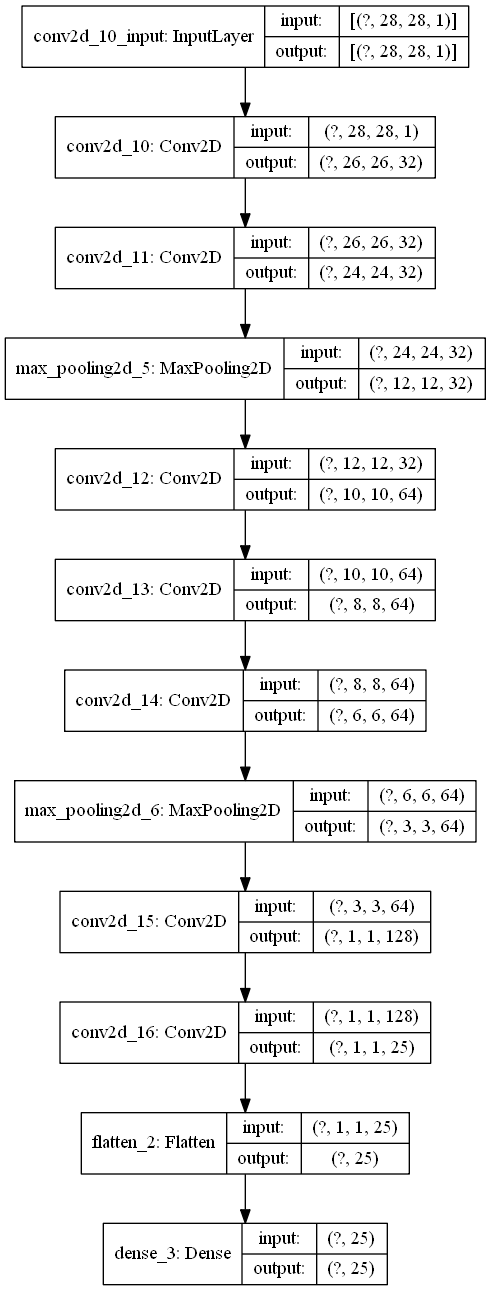

In [19]:
#saving the model_2 design
plot_model(model_2, to_file='model_2.png', show_shapes=True)

In [20]:
#Training the model_2
history2 = model_2.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))
model_2.save('C:/Users/vatsa/Downloads/model_save/model2.hdf5')

Epoch 1/15
469/469 [==============================] - 99s 211ms/step - loss: 0.6848 - acc: 0.7482 - val_loss: 0.4008 - val_acc: 0.8528
Epoch 2/15
469/469 [==============================] - 96s 205ms/step - loss: 0.3783 - acc: 0.8633 - val_loss: 0.3349 - val_acc: 0.8790
Epoch 3/15
469/469 [==============================] - 96s 206ms/step - loss: 0.3073 - acc: 0.8890 - val_loss: 0.2794 - val_acc: 0.8969
Epoch 4/15
469/469 [==============================] - 298s 636ms/step - loss: 0.2729 - acc: 0.8996 - val_loss: 0.2805 - val_acc: 0.8955
Epoch 5/15
469/469 [==============================] - 110s 234ms/step - loss: 0.2464 - acc: 0.9111 - val_loss: 0.2480 - val_acc: 0.9121
Epoch 6/15
469/469 [==============================] - 110s 234ms/step - loss: 0.2283 - acc: 0.9179 - val_loss: 0.2492 - val_acc: 0.9107
Epoch 7/15
469/469 [==============================] - 121s 258ms/step - loss: 0.2087 - acc: 0.9237 - val_loss: 0.2378 - val_acc: 0.9148
Epoch 8/15
469/469 [==============================]

In [21]:
#Model 3

model_3 = Sequential()

model_3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model_3.add(MaxPooling2D(pool_size = (2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size = (2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Flatten())

model_3.add(Dense(25, activation = 'softmax'))


model_3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model_3.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)             

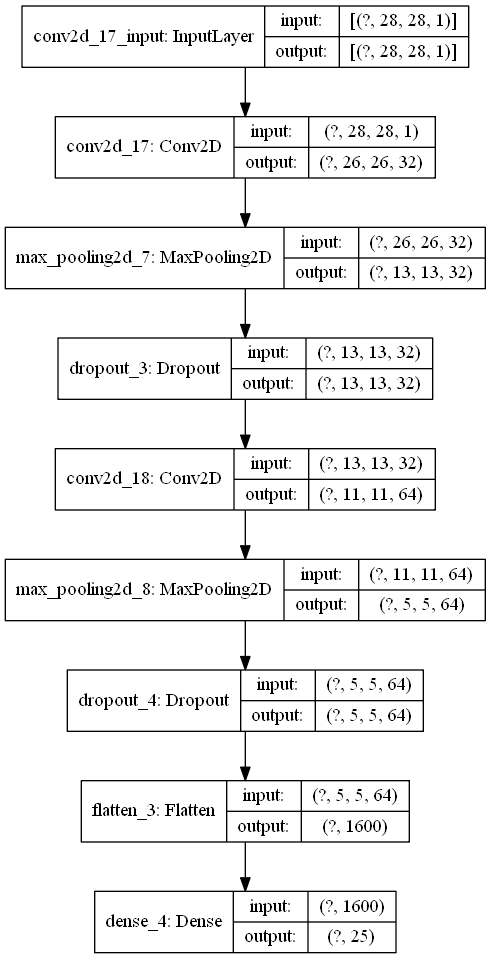

In [22]:
#saving the model_3 design
plot_model(model_3, to_file='model_3.png', show_shapes=True)

In [23]:
#training model_3

history3 = model_3.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))
model_3.save('C:/Users/vatsa/Downloads/model_save/model3.hdf5')

Epoch 1/15
469/469 [==============================] - 44s 94ms/step - loss: 0.7075 - acc: 0.7406 - val_loss: 0.4646 - val_acc: 0.8318
Epoch 2/15
469/469 [==============================] - 41s 87ms/step - loss: 0.4598 - acc: 0.8334 - val_loss: 0.3965 - val_acc: 0.8633
Epoch 3/15
469/469 [==============================] - 41s 88ms/step - loss: 0.4063 - acc: 0.8537 - val_loss: 0.3525 - val_acc: 0.8782
Epoch 4/15
469/469 [==============================] - 42s 89ms/step - loss: 0.3744 - acc: 0.8664 - val_loss: 0.3352 - val_acc: 0.8819
Epoch 5/15
469/469 [==============================] - 42s 90ms/step - loss: 0.3539 - acc: 0.8733 - val_loss: 0.3287 - val_acc: 0.8838
Epoch 6/15
469/469 [==============================] - 41s 87ms/step - loss: 0.3359 - acc: 0.8786 - val_loss: 0.3034 - val_acc: 0.8932
Epoch 7/15
469/469 [==============================] - 41s 87ms/step - loss: 0.3197 - acc: 0.8854 - val_loss: 0.2857 - val_acc: 0.9007
Epoch 8/15
469/469 [==============================] - 40s 86ms

In [131]:
from keras.models import load_model
from sklearn.metrics import accuracy_score

model_1 = load_model('C:/Users/vatsa/Downloads/model_save/model1.hdf5')
model_2 = load_model('C:/Users/vatsa/Downloads/model_save/model2.hdf5')
model_3 = load_model('C:/Users/vatsa/Downloads/model_save/model3.hdf5')

committee = [model_1, model_2, model_3]

predictions = [model.predict(X_test) for model in committee]
predictions= np.array(predictions)
summed = np.sum(predictions, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model_1.predict_classes(X_test)
prediction2 = model_2.predict_classes(X_test)
prediction3 = model_3.predict_classes(X_test)

accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

print('model_1 Accuracy = ', accuracy1)
print('model_2 Accuracy = ', accuracy2)
print('model_3 Accuracy = ', accuracy3)
print('Average Accuracy of the ensemble = ', ensemble_accuracy)


model_1 Accuracy =  0.9046
model_2 Accuracy =  0.9198
model_3 Accuracy =  0.9115
Average Accuracy of the ensemble =  0.9276


In [132]:

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

<AxesSubplot:>

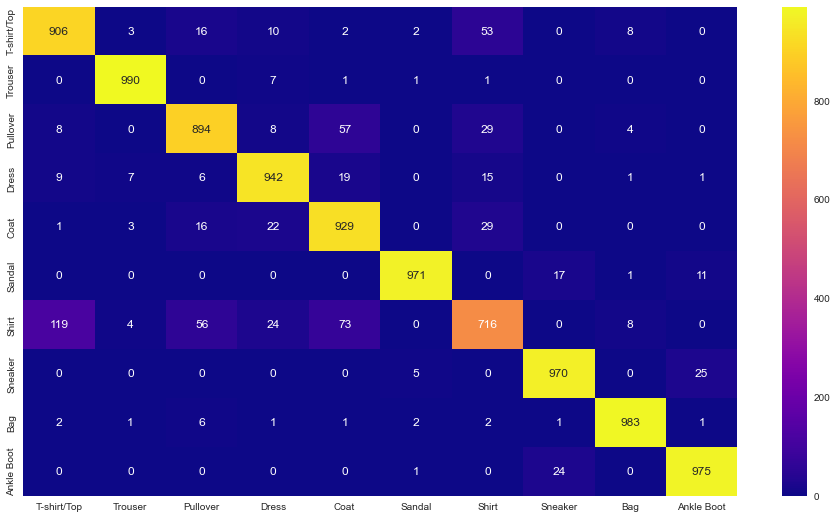

In [133]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,9))

cm = confusion_matrix(y_test,ensemble_prediction)
sns.heatmap(cm, cmap = 'plasma' , annot = True, fmt = 'd', xticklabels = classes, yticklabels = classes)

In [134]:
#classification report

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ensemble_prediction, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.87      0.91      0.89      1000
     Trouser       0.98      0.99      0.99      1000
    Pullover       0.90      0.89      0.90      1000
       Dress       0.93      0.94      0.94      1000
        Coat       0.86      0.93      0.89      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.85      0.72      0.78      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.96      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

